# Data 620 Assignment: High Frequency Words

Jithendra Seneviratne, Sheryl Piechocki 

June 23, 2020

In [66]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
import re, pprint
from nltk import word_tokenize
from urllib import request
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
import re
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [67]:
from urllib import request
url = "http://www.gutenberg.org/files/120/120-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print(raw.find("PART ONE--"))
print(raw.rfind("End of Project Gutenberg'"))


4276
372462


In [68]:
raw = raw[4276:372462]
# Count of words and punctuation symbols
print(len(raw))

368186


### raw

In [69]:
# clean up and remove punctuation
raw = raw.replace('-', ' ')
new_raw = re.sub(r'[^\w\s]', '', raw)

### new raw

In [70]:
#break up the string into words 
tokens = word_tokenize(new_raw)

print(len(tokens))

68706


### Count of distinct words, or "word types" 

In [71]:
print(len(set(tokens))) 

6496


In [72]:
tokens[:10]

['PART', 'ONE', 'The', 'Old', 'Buccaneer', '1', 'The', 'Old', 'Sea', 'dog']

In [73]:
tokens_lower = [word.lower() for word in tokens]

In [78]:
stop = stopwords.words('english') + ['mr',
                                     'mrs',
                                     'miss', 
                                     'say',
                                     'have', 
                                     'might',
                                     'thought',
                                     'would', 
                                     'could', 
                                     'make', 
                                     'much',
                                     'dear',
                                     'must',
                                     'know',
                                     'one',
                                     'good',
                                     'every',
                                     'towards',
                                     'give',
                                     'they',
                                     'say']

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    try:
        tag = get_wordnet_pos(nltk.pos_tag([word])[0][1])
        return lemmatizer.lemmatize(word, pos=tag)
    except:
        print('not lemmatized', word)
        pass

In [79]:
tokens_lower = [lemmatize_word(word) for word in tokens_lower if word not in stop]

In [80]:
fdist1 = FreqDist(tokens_lower);
fdist1.most_common(200)

[('man', 265),
 ('hand', 236),
 ('captain', 234),
 ('go', 229),
 ('well', 224),
 ('silver', 222),
 ('come', 217),
 ('like', 216),
 ('see', 213),
 ('take', 176),
 ('doctor', 173),
 ('u', 166),
 ('get', 165),
 ('upon', 152),
 ('time', 139),
 ('cry', 137),
 ('look', 136),
 ('ship', 133),
 ('still', 120),
 ('old', 119),
 ('begin', 118),
 ('two', 116),
 ('long', 115),
 ('sea', 112),
 ('back', 111),
 ('last', 111),
 ('ill', 109),
 ('squire', 106),
 ('little', 104),
 ('men', 102),
 ('sir', 102),
 ('side', 101),
 ('first', 99),
 ('word', 97),
 ('jim', 97),
 ('head', 94),
 ('way', 93),
 ('lay', 92),
 ('another', 86),
 ('house', 85),
 ('dont', 85),
 ('round', 84),
 ('john', 84),
 ('never', 83),
 ('eye', 82),
 ('island', 81),
 ('thats', 81),
 ('great', 79),
 ('enough', 74),
 ('right', 74),
 ('dead', 73),
 ('sure', 73),
 ('think', 72),
 ('even', 71),
 ('soon', 71),
 ('moment', 69),
 ('three', 68),
 ('put', 68),
 ('thing', 68),
 ('tell', 67),
 ('turn', 67),
 ('voice', 66),
 ('face', 66),
 ('found',

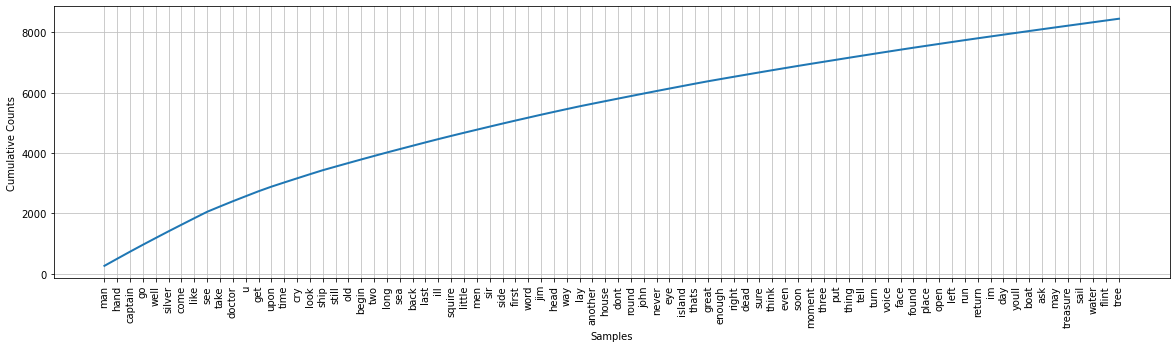

In [81]:
plt.figure(figsize=(20,5))
fdist1.plot(80,
            cumulative=True)
plt.show()